In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv(r'C:\Users\srs88\Desktop\internships\GRIP\Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
data=df.copy()

In [11]:
del data['Species']

In [12]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [20]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns

In [29]:
for n_clusters in range(2,10):
    cluster_model=AgglomerativeClustering(n_clusters=n_clusters,affinity='euclidean',linkage='ward')
    cluster_labels=cluster_model.fit_predict(data)
    silhouette_avg=silhouette_score(data,cluster_labels,metric='euclidean')
    print("for n_clusters =", n_clusters, "The Average silhouette_score is:",silhouette_avg)

for n_clusters = 2 The Average silhouette_score is: 0.6002991638159242
for n_clusters = 3 The Average silhouette_score is: 0.5539418524164824
for n_clusters = 4 The Average silhouette_score is: 0.5293728829020553
for n_clusters = 5 The Average silhouette_score is: 0.4996173067712791
for n_clusters = 6 The Average silhouette_score is: 0.5138881378160802
for n_clusters = 7 The Average silhouette_score is: 0.49571425216237003
for n_clusters = 8 The Average silhouette_score is: 0.47711724314952525
for n_clusters = 9 The Average silhouette_score is: 0.485796158594214


In [33]:
data.columns  

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'cluster_hclus'],
      dtype='object')

In [31]:
hclus=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
labels_hclus=hclus.fit_predict(data)
data['cluster_hclus']=labels_hclus

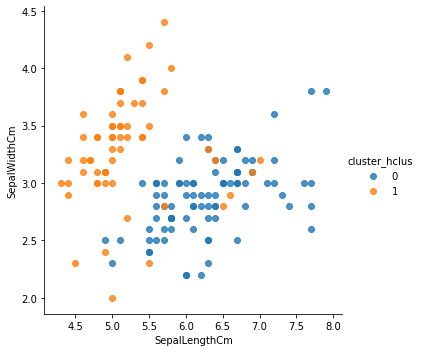

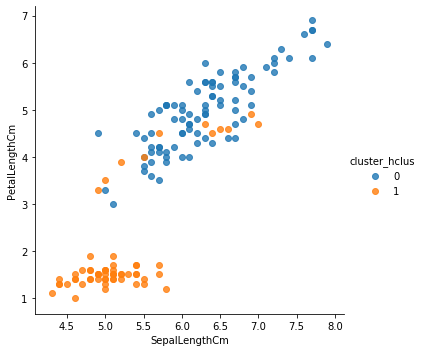

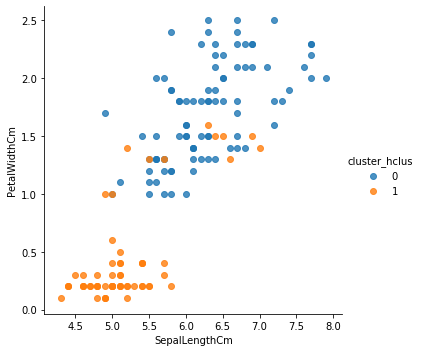

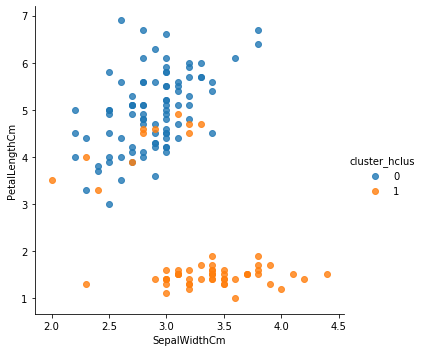

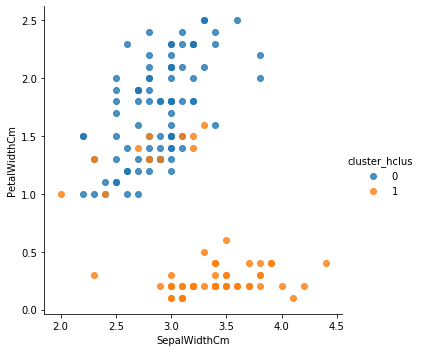

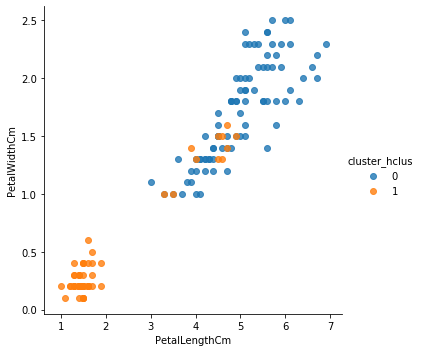

In [35]:
sns.lmplot(fit_reg=False,x='SepalLengthCm',y='SepalWidthCm',data=data,hue='cluster_hclus')
sns.lmplot(fit_reg=False,x='SepalLengthCm',y='PetalLengthCm',data=data,hue='cluster_hclus')
sns.lmplot(fit_reg=False,x='SepalLengthCm',y='PetalWidthCm',data=data,hue='cluster_hclus')
sns.lmplot(fit_reg=False,x='SepalWidthCm',y='PetalLengthCm',data=data,hue='cluster_hclus')
sns.lmplot(fit_reg=False,x='SepalWidthCm',y='PetalWidthCm',data=data,hue='cluster_hclus')
sns.lmplot(fit_reg=False,x='PetalLengthCm',y='PetalWidthCm',data=data,hue='cluster_hclus')
